In [4]:
import numpy as np
import rasterio as rio
sys.path.append('/Users/zachkeskinen/Documents/uavsar_snow/geolocate')
from geolocate import geolocate_uavsar
import matplotlib.pyplot as plt

## Geolocate LKV and DEM

In [2]:
lkv_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.lkv'
llh_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_01_BU_s1_2x8.llh'
out_dir = '/Users/zachkeskinen/Documents/uavsar_snow/incidence_angle/data'
ann_fp = '/Users/zachkeskinen/Documents/uavsar_snow/jemez_slc/alamos_35915_20005_003_200212_L090HH_01_BU.ann'

geolocate_uavsar(in_fp = lkv_fp, out_dir = out_dir, ann_fp= ann_fp, llh_fp=llh_fp)

## Calculate Gradient

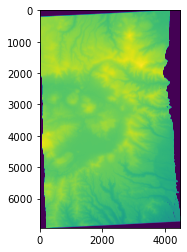

In [5]:
with rio.open('/Users/zachkeskinen/Documents/uavsar_snow/incidence_angle/geolocated_dem_lkv/llh.dem.tif') as src:
    arr = src.read(1)
plt.imshow(arr)

In [35]:
dx, dy = np.gradient(arr, 5, 5)

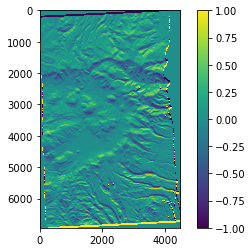

In [36]:
plt.imshow(dx, vmax = 1, vmin = -1)
plt.colorbar()

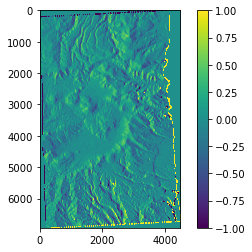

In [37]:
plt.imshow(dy, vmax = 1, vmin = -1)
plt.colorbar()

In [29]:
lkv = {}
for direction in ['x','y','z']:
    with rio.open(f'/Users/zachkeskinen/Documents/uavsar_snow/incidence_angle/geolocated_dem_lkv/lkv.{direction}.tif') as src:
        lkv[direction] = src.read(1)

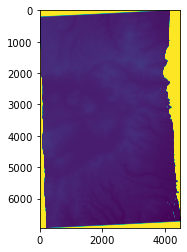

In [40]:
plt.imshow(lkv['z'])

In [71]:
mag = np.zeros_like(lkv['x'])
for direction, arr in lkv.items():
    mag = mag + arr**2
mag = mag**0.5
mag[mag == 0] = np.nan

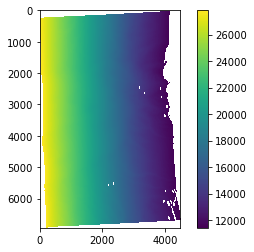

In [72]:
plt.imshow(mag)
plt.colorbar()

In [73]:
new_lkv = {}
for direction, arr in lkv.items():
    new_lkv[direction] = arr
    new_lkv[f'{direction}_unit'] = np.abs(arr/mag)

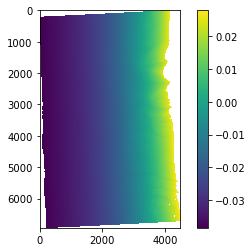

In [74]:
plt.imshow(new_lkv['x_unit'], interpolation='nearest')
plt.colorbar()

In [75]:
inc = new_lkv['x_unit']*dx + new_lkv['y_unit']*dy + new_lkv['z_unit']
inc = np.arccos(inc)

/Users/zachkeskinen/miniconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


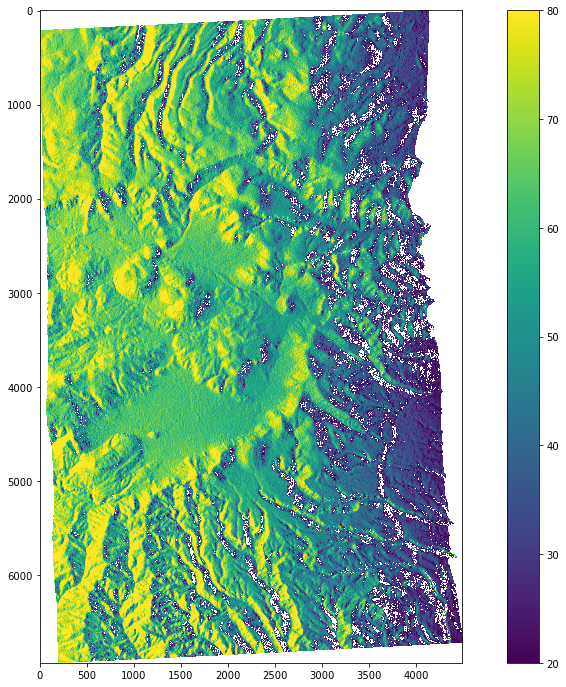

In [76]:
plt.subplots(figsize = (16,12))
plt.imshow(np.rad2deg(inc), vmin = 20, vmax = 80, interpolation='nearest')
plt.colorbar()

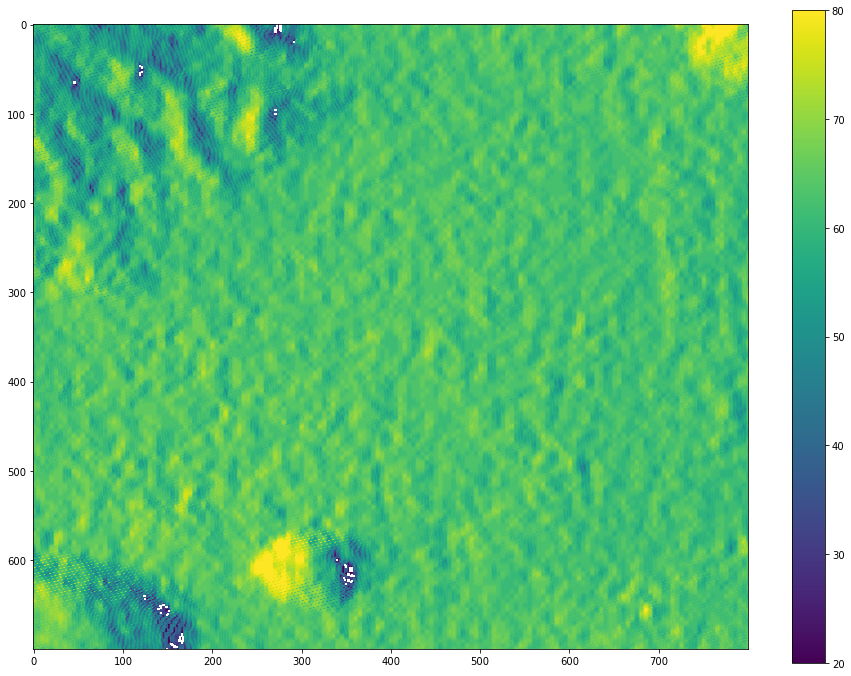

In [80]:
plt.subplots(figsize = (16,12))
plt.imshow(np.rad2deg(inc)[3900:4600,900:1700], vmin = 20, vmax = 80)
plt.colorbar()